 # News Articles Analysis 

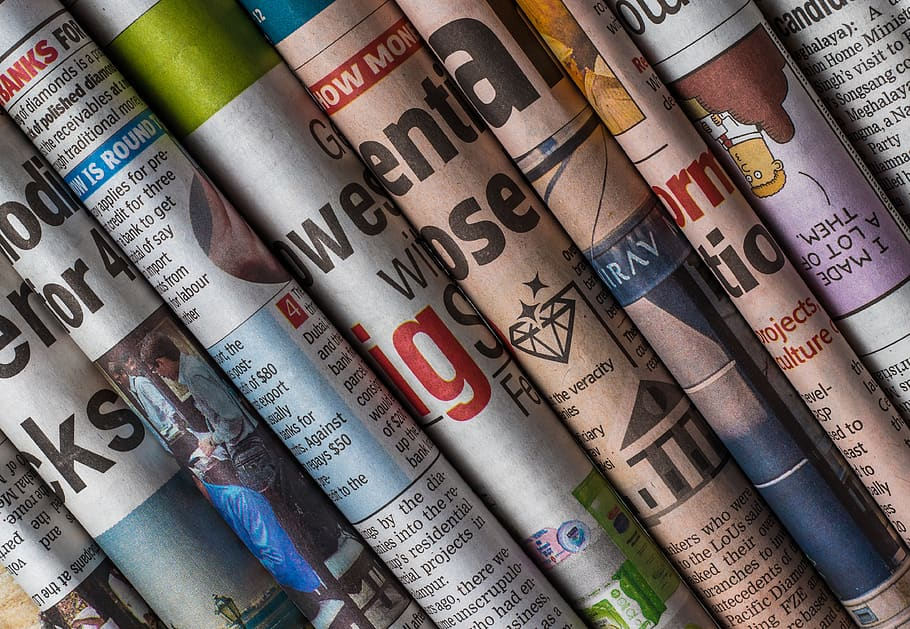

<a id="cont"></a>

## Table of Contents
* <b>[1. Project Overview](#chapter1)
    * [1.1 Introduction](#section_1_1)
    * [1.2 Objectives](#section_1_2)
* <b>[2. Importing Packages](#chapter2)
* <b>[3. Loading Data](#chapter3)
* <b>[4. Data Cleaning](#chapter4)
* <b>[5. Exploratory Data Analysis (EDA)](#chapter5)
* <b>[6. Data Preproccessing](#chapter6)
* <b>[7. Train-test splits](#chapter7)
* <b>[8. Conclusion](#chapter8)</b>
* <b>[9. References](#chapter9)

## 1. Project Overview <a class="anchor" id="chapter1"></a>

### 1.1 Introduction <a class="anchor" id="section_1_1"></a>

### 1.2 Objectives <a class="anchor" id="section_1_2"></a>

## 2. Importing Packages <a class="anchor" id="chapter2"></a>


+ For data manipulation and analysis, `Pandas` and `Numpy`.
+ For data visualization, `Matplotlib` and `Seaborn`.


In [65]:
# Importing packages for data manipulation and analysis
import numpy as np
import pandas as pd
import csv
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from collections import Counter
# import contractions
# from langdetect import detect
#from textblob import TextBlob
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report


# Libraries for Handing Errors
import warnings
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'textblob'

In [3]:
# Necessary Libraries
import nltk

In [4]:
from nltk.corpus import stopwords

In [5]:
import string

## 3. Loading Data <a class="anchor" id="chapter3"></a>

In [6]:
# loading dataset
import pandas as pd
train_df = pd.read_csv("Data\\train.csv")

test_df = pd.read_csv("Data\\test.csv")


To prevent any major unnecessary changes occurring to the original data , a copy of the dataframe was made using the df.copy() method and referred to as df_copy

In [7]:
# The copy of the dataframe
train_df_copy = train_df.copy()

test_df_copy = test_df.copy()

## 4.Data Cleaning <a class="anchor" id="chapter4"></a>

### Train Data Cleaning

In [8]:
train_df_copy.head()

,headlines,description,content,url,category
0,RBI revises definition of politically-exposed ...,The central bank has also asked chairpersons a...,The Reserve Bank of India (RBI) has changed th...,https://indianexpress.com/article/business/ban...,business
1,NDTV Q2 net profit falls 57.4% to Rs 5.55 cror...,NDTV's consolidated revenue from operations wa...,Broadcaster New Delhi Television Ltd on Monday...,https://indianexpress.com/article/business/com...,business
2,"Akasa Air ‘well capitalised’, can grow much fa...",The initial share sale will be open for public...,Homegrown server maker Netweb Technologies Ind...,https://indianexpress.com/article/business/mar...,business
3,India’s current account deficit declines sharp...,The current account deficit (CAD) was 3.8 per ...,India’s current account deficit declined sharp...,https://indianexpress.com/article/business/eco...,business
4,"States borrowing cost soars to 7.68%, highest ...",The prices shot up reflecting the overall high...,States have been forced to pay through their n...,https://indianexpress.com/article/business/eco...,business


Check for the columns in the Dataframe and Shape

In [9]:
# Check the columns of the DataFrame
print(train_df_copy.columns)


Index(['headlines', 'description', 'content', 'url', 'category'], dtype='object')


In [10]:
train_df_copy.shape

(5520, 5)

In [11]:
train_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5520 entries, 0 to 5519
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   headlines    5520 non-null   object
 1   description  5520 non-null   object
 2   content      5520 non-null   object
 3   url          5520 non-null   object
 4   category     5520 non-null   object
dtypes: object(5)
memory usage: 215.8+ KB


In [12]:
# Checking for duplicates
duplicates = train_df_copy.duplicated().sum()
print(f'Duplicates: {duplicates}')

Duplicates: 0


In [13]:
# Check for Unique Values
unique_values = train_df_copy.nunique()
print(f"\nUnique Values:\n{unique_values}")


Unique Values:
headlines      5512
description    5508
content        5513
url            5514
category          5
dtype: int64


In [14]:
# Check for Missing Values/Nulls
missing_values = train_df_copy.isnull().sum()
print(f"\nMissing Values:\n{missing_values}")


Missing Values:
headlines      0
description    0
content        0
url            0
category       0
dtype: int64


## Text Cleaning 

### Removing stop words

In [15]:
#We print out the stopwords for English
stopwords_list = stopwords.words('english')
print(stopwords_list)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [16]:
# Function to remove stop words from a text
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    if isinstance(text, str):
        tokens = text.split()
        filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
        return ' '.join(filtered_tokens)
    return text

In [17]:
#Apply function to the dataframe
train_df_copy = train_df_copy.applymap(remove_stopwords)

In [18]:
#Showing the dataframe without stopwords
print("\nData without stopwords:")
train_df_copy.head()


Data without stopwords:


,headlines,description,content,url,category
0,RBI revises definition politically-exposed per...,central bank also asked chairpersons chief exe...,Reserve Bank India (RBI) changed definition Po...,https://indianexpress.com/article/business/ban...,business
1,NDTV Q2 net profit falls 57.4% Rs 5.55 crore i...,NDTV's consolidated revenue operations Rs 95.5...,Broadcaster New Delhi Television Ltd Monday re...,https://indianexpress.com/article/business/com...,business
2,"Akasa Air ‘well capitalised’, grow much faster...",initial share sale open public subscription Ju...,Homegrown server maker Netweb Technologies Ind...,https://indianexpress.com/article/business/mar...,business
3,India’s current account deficit declines sharp...,current account deficit (CAD) 3.8 per cent GDP...,India’s current account deficit declined sharp...,https://indianexpress.com/article/business/eco...,business
4,"States borrowing cost soars 7.68%, highest far...",prices shot reflecting overall higher risk ave...,States forced pay nose weekly auction debt Tue...,https://indianexpress.com/article/business/eco...,business


### Removing noise

In [19]:
# Replace URLs in the 'url' column with a placeholder string
pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
subs_url = r'url-web'
train_df_copy['url'] = train_df_copy['url'].replace(to_replace = pattern_url, value = subs_url, regex = True)

In [20]:
train_df_copy.head()

,headlines,description,content,url,category
0,RBI revises definition politically-exposed per...,central bank also asked chairpersons chief exe...,Reserve Bank India (RBI) changed definition Po...,url-web,business
1,NDTV Q2 net profit falls 57.4% Rs 5.55 crore i...,NDTV's consolidated revenue operations Rs 95.5...,Broadcaster New Delhi Television Ltd Monday re...,url-web,business
2,"Akasa Air ‘well capitalised’, grow much faster...",initial share sale open public subscription Ju...,Homegrown server maker Netweb Technologies Ind...,url-web,business
3,India’s current account deficit declines sharp...,current account deficit (CAD) 3.8 per cent GDP...,India’s current account deficit declined sharp...,url-web,business
4,"States borrowing cost soars 7.68%, highest far...",prices shot reflecting overall higher risk ave...,States forced pay nose weekly auction debt Tue...,url-web,business


### Remove punctuation

First we make all the text lowercase to remove some noise from capitalisation.

In [21]:
train_df_copy['headlines'] = train_df_copy['headlines'].str.lower()
train_df_copy['description'] = train_df_copy['description'].str.lower()
train_df_copy['content'] = train_df_copy['content'].str.lower()
train_df_copy['url'] = train_df_copy['url'].str.lower()
train_df_copy['category'] = train_df_copy['category'].str.lower()

Now let's remove the punctuation using the `string` import.

In [22]:
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [23]:
##Defining a cleaning function
def remove_punctuation(text):
    if isinstance(text, str):  # Check if the cell contains a string
        return text.translate(str.maketrans('', '', string.punctuation))
    return text

In [24]:
#Apply the function to the dataframe
train_df_copy = train_df_copy.applymap(remove_punctuation)

print("\nCleaned Data without punctuation:")
train_df_copy.head()


Cleaned Data without punctuation:


,headlines,description,content,url,category
0,rbi revises definition politicallyexposed pers...,central bank also asked chairpersons chief exe...,reserve bank india rbi changed definition poli...,urlweb,business
1,ndtv q2 net profit falls 574 rs 555 crore impa...,ndtvs consolidated revenue operations rs 9555 ...,broadcaster new delhi television ltd monday re...,urlweb,business
2,akasa air ‘well capitalised’ grow much faster ...,initial share sale open public subscription ju...,homegrown server maker netweb technologies ind...,urlweb,business
3,india’s current account deficit declines sharp...,current account deficit cad 38 per cent gdp us...,india’s current account deficit declined sharp...,urlweb,business
4,states borrowing cost soars 768 highest far fi...,prices shot reflecting overall higher risk ave...,states forced pay nose weekly auction debt tue...,urlweb,business


### Remove emojis


In [25]:
#We define a function to remove emojis from the strings
import re
def remove_emojis(text):
    if isinstance(text, str):  # Check if the cell contains a string
        # Define a regex pattern for emojis
        emoji_pattern = re.compile(
            "[" 
            "\U0001F600-\U0001F64F"  # emoticons
            "\U0001F300-\U0001F5FF"  # symbols & pictographs
            "\U0001F680-\U0001F6FF"  # transport & map symbols
            "\U0001F1E0-\U0001F1FF"  # flags (iOS)
            "\U00002702-\U000027B0"
            "\U000024C2-\U0001F251"
            "]+", flags=re.UNICODE)
        return emoji_pattern.sub(r'', text)
    return text

In [26]:
#We apply the function to the entire dataframe
train_df_copy.applymap(remove_emojis)

print("\nCleaned Data without emojis:")
train_df_copy.head()


Cleaned Data without emojis:


,headlines,description,content,url,category
0,rbi revises definition politicallyexposed pers...,central bank also asked chairpersons chief exe...,reserve bank india rbi changed definition poli...,urlweb,business
1,ndtv q2 net profit falls 574 rs 555 crore impa...,ndtvs consolidated revenue operations rs 9555 ...,broadcaster new delhi television ltd monday re...,urlweb,business
2,akasa air ‘well capitalised’ grow much faster ...,initial share sale open public subscription ju...,homegrown server maker netweb technologies ind...,urlweb,business
3,india’s current account deficit declines sharp...,current account deficit cad 38 per cent gdp us...,india’s current account deficit declined sharp...,urlweb,business
4,states borrowing cost soars 768 highest far fi...,prices shot reflecting overall higher risk ave...,states forced pay nose weekly auction debt tue...,urlweb,business


### Stemming and Lemmzatizing

In [27]:
#Importing algorithms
from nltk import SnowballStemmer, PorterStemmer, LancasterStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


In [28]:
#Stemming function
def stem_text(text):
    stemmer = PorterStemmer()
    if isinstance(text, str):
        return ' '.join([stemmer.stem(word) for word in text.split()])
    return text

# Lemmatization function
def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    if isinstance(text, str):
        return ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
    return text

In [29]:

# Apply stemming to the entire DataFrame
df_stemmed = train_df_copy.applymap(stem_text)

# Apply lemmatization to the entire DataFrame
df_lemmatized = train_df_copy.applymap(lemmatize_text)


In [30]:
print("\nStemmed Data:")
df_stemmed.head()


Stemmed Data:


,headlines,description,content,url,category
0,rbi revis definit politicallyexpos person kyc ...,central bank also ask chairperson chief execut...,reserv bank india rbi chang definit politicall...,urlweb,busi
1,ndtv q2 net profit fall 574 rs 555 crore impac...,ndtv consolid revenu oper rs 9555 crore rs 105...,broadcast new delhi televis ltd monday report ...,urlweb,busi
2,akasa air ‘well capitalised’ grow much faster ...,initi share sale open public subscript juli 17...,homegrown server maker netweb technolog india ...,urlweb,busi
3,india’ current account deficit declin sharpli ...,current account deficit cad 38 per cent gdp us...,india’ current account deficit declin sharpli ...,urlweb,busi
4,state borrow cost soar 768 highest far fiscal,price shot reflect overal higher risk avers in...,state forc pay nose weekli auction debt tuesda...,urlweb,busi


In [31]:
print("\nLemmatized Data:")
df_lemmatized.head()


Lemmatized Data:


,headlines,description,content,url,category
0,rbi revise definition politicallyexposed perso...,central bank also asked chairperson chief exec...,reserve bank india rbi changed definition poli...,urlweb,business
1,ndtv q2 net profit fall 574 r 555 crore impact...,ndtvs consolidated revenue operation r 9555 cr...,broadcaster new delhi television ltd monday re...,urlweb,business
2,akasa air ‘well capitalised’ grow much faster ...,initial share sale open public subscription ju...,homegrown server maker netweb technology india...,urlweb,business
3,india’s current account deficit decline sharpl...,current account deficit cad 38 per cent gdp us...,india’s current account deficit declined sharp...,urlweb,business
4,state borrowing cost soar 768 highest far fiscal,price shot reflecting overall higher risk aver...,state forced pay nose weekly auction debt tues...,urlweb,business


## Handling Contractions
## Expand Contractions
##### Expanding contractions can help improve the quality of text data

In [32]:
def expand_contractions(text):
    if isinstance(text, str):
        return contractions.fix(text)
    return text

## Correcting Spelling Errors
##### Spell Correction:
##### Correcting spelling errors can improve the quality of text data.

In [33]:
def correct_spelling(text):
    if isinstance(text, str):
        return str(TextBlob(text).correct())
    return text


## Removing Non-English Text
##### Detect and Remove Non-English Text:
##### Sometimes text data may contain non-English content which can be filtered out.

In [34]:
def is_english(text):
    try:
        return detect(text) == 'en'
    except:
        return False

#### <a href=#cont>Back to Table of Contents</a>

---

## 5.Exploratory Data Analysis (EDA) <a class="anchor" id="chapter5"></a>

In [52]:
train_df_copy.head()

,headlines,description,content,url,category,headline_length,description_length,content_length,combined_text
0,rbi revises definition politicallyexposed pers...,central bank also asked chairpersons chief exe...,reserve bank india rbi changed definition poli...,urlweb,business,7,16,159,rbi revises definition politicallyexposed pers...
1,ndtv q2 net profit falls 574 rs 555 crore impa...,ndtvs consolidated revenue operations rs 9555 ...,broadcaster new delhi television ltd monday re...,urlweb,business,14,12,108,ndtv q2 net profit falls 574 rs 555 crore impa...
2,akasa air ‘well capitalised’ grow much faster ...,initial share sale open public subscription ju...,homegrown server maker netweb technologies ind...,urlweb,business,10,16,231,akasa air ‘well capitalised’ grow much faster ...
3,india’s current account deficit declines sharp...,current account deficit cad 38 per cent gdp us...,india’s current account deficit declined sharp...,urlweb,business,10,14,117,india’s current account deficit declines sharp...
4,states borrowing cost soars 768 highest far fi...,prices shot reflecting overall higher risk ave...,states forced pay nose weekly auction debt tue...,urlweb,business,8,11,163,states borrowing cost soars 768 highest far fi...


##### Ploting the most frequent words

In [53]:
def get_word_frequency(text):
    words = text.split()
    return Counter(words)

In [54]:
# Get combined text for each column
headlines_text = ' '.join(train_df_copy['headlines'])
description_text = ' '.join(train_df_copy['description'])
content_text = ' '.join(train_df_copy['content'])

In [55]:
# Getting word frequency for each column
headlines_freq = get_word_frequency(headlines_text)
description_freq = get_word_frequency(description_text)
content_freq = get_word_frequency(content_text)

In [56]:
# Convert frequency dictionaries to DataFrames for easier visualization
headlines_freq_df = pd.DataFrame(headlines_freq.items(), columns=['Word', 'Frequency']).sort_values(by='Frequency', ascending=False)
description_freq_df = pd.DataFrame(description_freq.items(), columns=['Word', 'Frequency']).sort_values(by='Frequency', ascending=False)
content_freq_df = pd.DataFrame(content_freq.items(), columns=['Word', 'Frequency']).sort_values(by='Frequency', ascending=False)

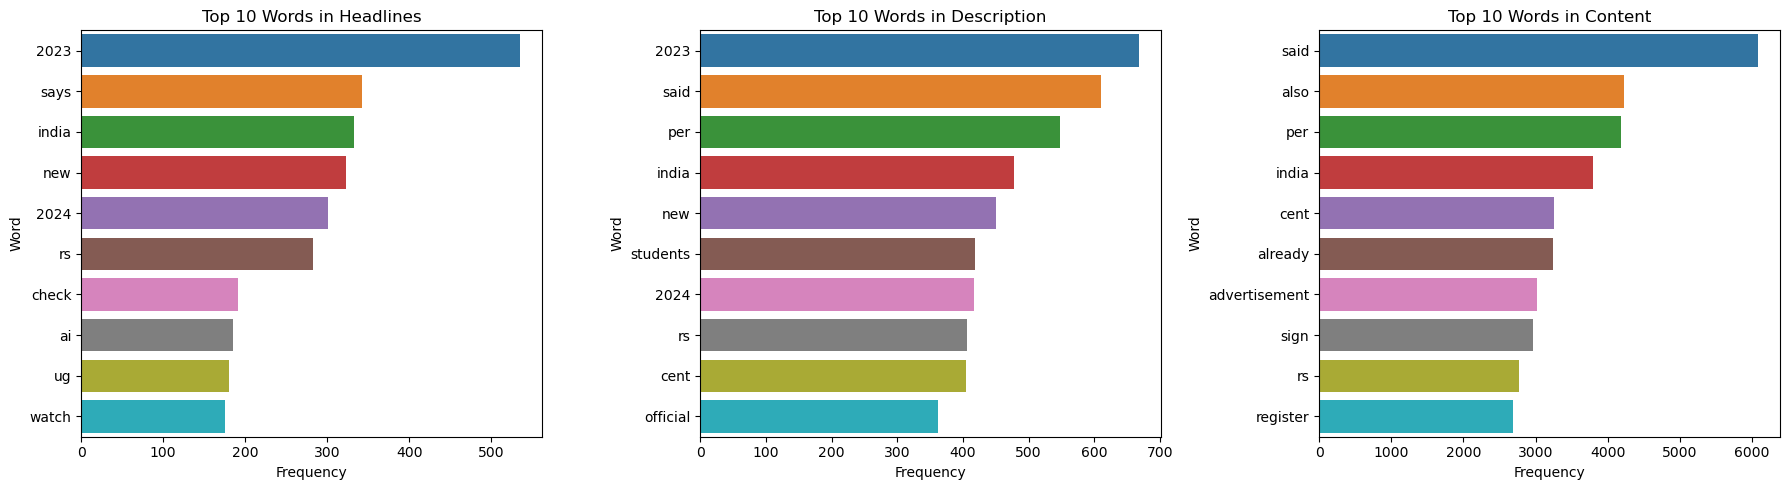

In [57]:
# Visualize the top 10 most frequent words in each column
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.barplot(x='Frequency', y='Word', data=headlines_freq_df.head(10))
plt.title('Top 10 Words in Headlines')

plt.subplot(1, 3, 2)
sns.barplot(x='Frequency', y='Word', data=description_freq_df.head(10))
plt.title('Top 10 Words in Description')

plt.subplot(1, 3, 3)
sns.barplot(x='Frequency', y='Word', data=content_freq_df.head(10))
plt.title('Top 10 Words in Content')

plt.tight_layout()
plt.show()

## Adding Text Length Columns
#### First, let's calculate the lengths of the text in the 'headlines', 'description', and 'content' columns and add them to the DataFrame:

In [58]:
# Calculate the length of text in each column
train_df_copy['headline_length'] = train_df_copy['headlines'].apply(lambda x: len(x.split()) if isinstance(x, str) else 0)
train_df_copy['description_length'] = train_df_copy['description'].apply(lambda x: len(x.split()) if isinstance(x, str) else 0)
train_df_copy['content_length'] = train_df_copy['content'].apply(lambda x: len(x.split()) if isinstance(x, str) else 0)

## Distribution of Categories
#### This count plot shows the frequency of each category in the dataset.

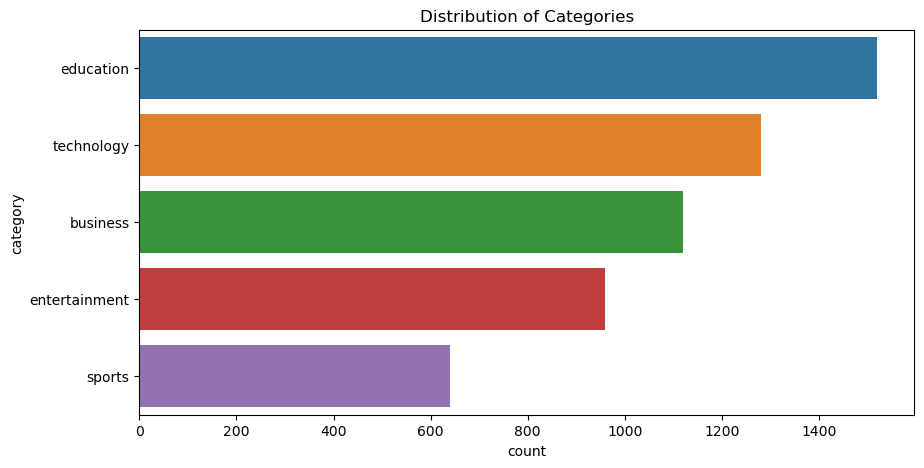

In [59]:
# Plotting the distribution of categories
plt.figure(figsize=(10, 5))
sns.countplot(y='category', data=train_df_copy, order=train_df_copy['category'].value_counts().index)
plt.title('Distribution of Categories')
plt.show()

## Correlation Matrix

This visualization helps to understand the relationships between numerical variables.

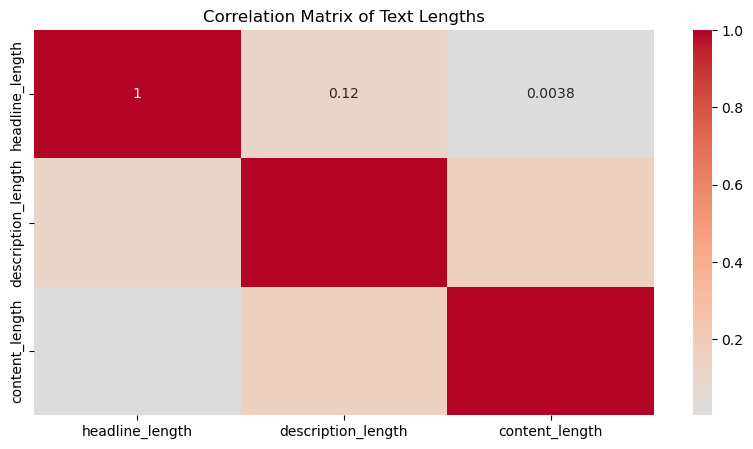

In [60]:
# Plotting correlation matrix
plt.figure(figsize=(10, 5))
correlation_matrix = train_df_copy[['headline_length', 'description_length', 'content_length']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Text Lengths')
plt.show()

## Box Plots for Text Lengths
#### Box plots display the distribution of text lengths and highlight the presence of outliers for the 'headlines', 'description', and 'content' columns.

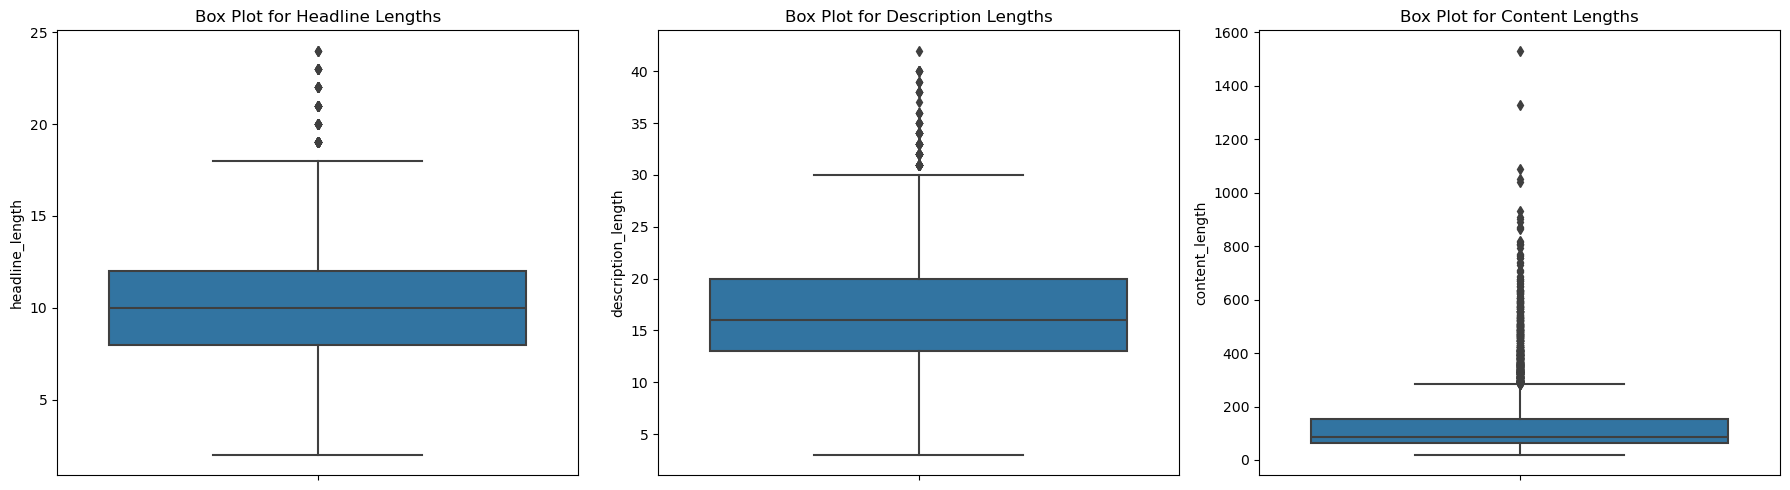

In [61]:
# Box plot for headline lengths
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.boxplot(y=train_df_copy['headline_length'])
plt.title('Box Plot for Headline Lengths')

plt.subplot(1, 3, 2)
sns.boxplot(y=train_df_copy['description_length'])
plt.title('Box Plot for Description Lengths')

plt.subplot(1, 3, 3)
sns.boxplot(y=train_df_copy['content_length'])
plt.title('Box Plot for Content Lengths')

plt.tight_layout()
plt.show()

## Pair Plot of Text Lengths
#### Pair plots visualize the pairwise relationships between the lengths of text in 'headlines', 'description', and 'content'.

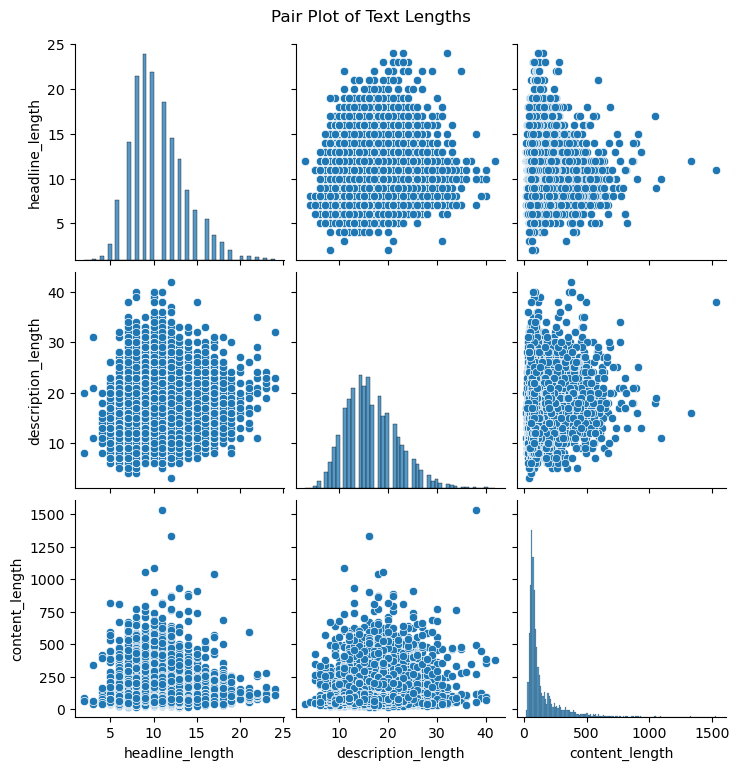

In [62]:
# Pair Plot of Text Lengths
sns.pairplot(train_df_copy[['headline_length', 'description_length', 'content_length']])
plt.suptitle('Pair Plot of Text Lengths', y=1.02)
plt.show()

##### Text Length Distribution by Category
##### Analyze the distribution of text length across different categories:

In [67]:
# Add columns for text length
train_df_copy['headlines_length'] = train_df_copy['headlines'].apply(lambda x: len(str(x).split()))
train_df_copy['description_length'] = train_df_copy['description'].apply(lambda x: len(str(x).split()))
train_df_copy['content_length'] = train_df_copy['content'].apply(lambda x: len(str(x).split()))

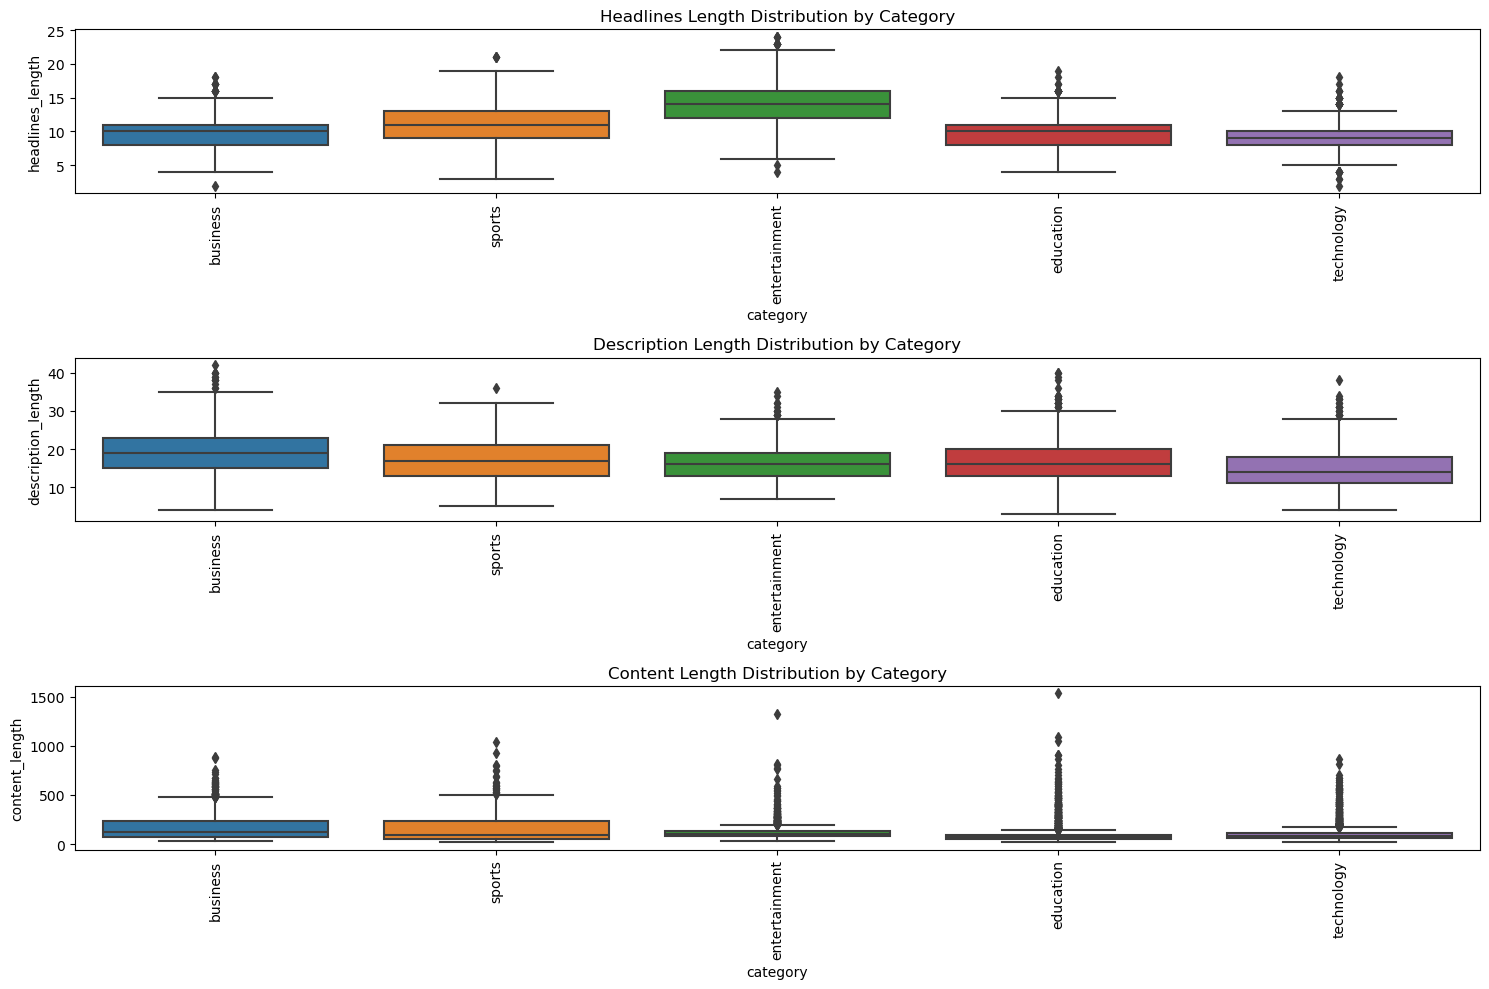

In [68]:
# Plot text length distribution by category
plt.figure(figsize=(15, 10))

plt.subplot(3, 1, 1)
sns.boxplot(x='category', y='headlines_length', data=train_df_copy)
plt.title('Headlines Length Distribution by Category')
plt.xticks(rotation=90)

plt.subplot(3, 1, 2)
sns.boxplot(x='category', y='description_length', data=train_df_copy)
plt.title('Description Length Distribution by Category')
plt.xticks(rotation=90)

plt.subplot(3, 1, 3)
sns.boxplot(x='category', y='content_length', data=train_df_copy)
plt.title('Content Length Distribution by Category')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

#### <a href=#cont>Back to Table of Contents</a>

---

## 6.Data Preprocessing <a class="anchor" id="chapter6"></a>

In [69]:
# We combine 'headlines', 'description', and 'content' into one column called 'combined_text'. 
# To ensure that all the text data is utilized.
train_df_copy['combined_text'] = train_df_copy['headlines'] + ' ' + train_df_copy['description'] + ' ' + train_df_copy['content']

In [70]:
# converting the text data into numerical features.
tfidf = TfidfVectorizer(max_features=5000)

# Transforming the combined text data
X = tfidf.fit_transform(train_df_copy['combined_text']).toarray()
y = train_df_copy['category']

In [71]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [72]:
# Initialize and train Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Make predictions
y_pred = nb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")

Accuracy: 0.9782608695652174
Classification Report:
               precision    recall  f1-score   support

     business       0.98      0.96      0.97       245
    education       0.99      0.99      0.99       274
entertainment       0.97      0.99      0.98       178
       sports       0.97      0.99      0.98       137
   technology       0.98      0.97      0.98       270

     accuracy                           0.98      1104
    macro avg       0.98      0.98      0.98      1104
 weighted avg       0.98      0.98      0.98      1104



In [73]:
# Initialize and train Logistic Regression model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# Make predictions
y_pred = lr_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")

Accuracy: 0.9827898550724637
Classification Report:
               precision    recall  f1-score   support

     business       0.97      0.97      0.97       245
    education       0.99      0.99      0.99       274
entertainment       1.00      0.99      0.99       178
       sports       0.98      0.99      0.99       137
   technology       0.98      0.97      0.98       270

     accuracy                           0.98      1104
    macro avg       0.98      0.98      0.98      1104
 weighted avg       0.98      0.98      0.98      1104



In [74]:
# Initialize Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Model
rf_model.fit(X_train, y_train)

# Make Predictions
y_pred = rf_model.predict(X_test)

# Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")

Accuracy: 0.9556159420289855
Classification Report:
               precision    recall  f1-score   support

     business       0.95      0.95      0.95       245
    education       0.98      0.99      0.99       274
entertainment       0.99      0.93      0.96       178
       sports       0.96      0.93      0.94       137
   technology       0.91      0.95      0.93       270

     accuracy                           0.96      1104
    macro avg       0.96      0.95      0.95      1104
 weighted avg       0.96      0.96      0.96      1104



In [75]:
# Initialize KNN Classifier
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust 'n_neighbors' as needed

# Train the Model
knn_model.fit(X_train, y_train)

# Make Predictions
y_pred = knn_model.predict(X_test)

# Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")

Accuracy: 0.9710144927536232
Classification Report:
               precision    recall  f1-score   support

     business       0.95      0.98      0.96       245
    education       0.99      0.99      0.99       274
entertainment       0.97      0.98      0.97       178
       sports       0.95      0.99      0.97       137
   technology       0.98      0.94      0.96       270

     accuracy                           0.97      1104
    macro avg       0.97      0.97      0.97      1104
 weighted avg       0.97      0.97      0.97      1104



In [ ]:
# Initialize SVM Classifier
svm_model = SVC(kernel='linear')  # Linear kernel is often used for text classification

# Train the Model
svm_model.fit(X_train, y_train)

# Make Predictions
y_pred = svm_model.predict(X_test)

# Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")

#### <a href=#cont>Back to Table of Contents</a>

---

## 7.Train-test splits <a class="anchor" id="chapter7"></a>

#### <a href=#cont>Back to Table of Contents</a>

---

## 8.Conclusion <a class="anchor" id="chapter8"></a>

## 9.References <a class="anchor" id="chapter9"></a>

#### <a href=#cont>Back to Table of Contents</a>

---